# AIRLINES FLIGHTS DATASET

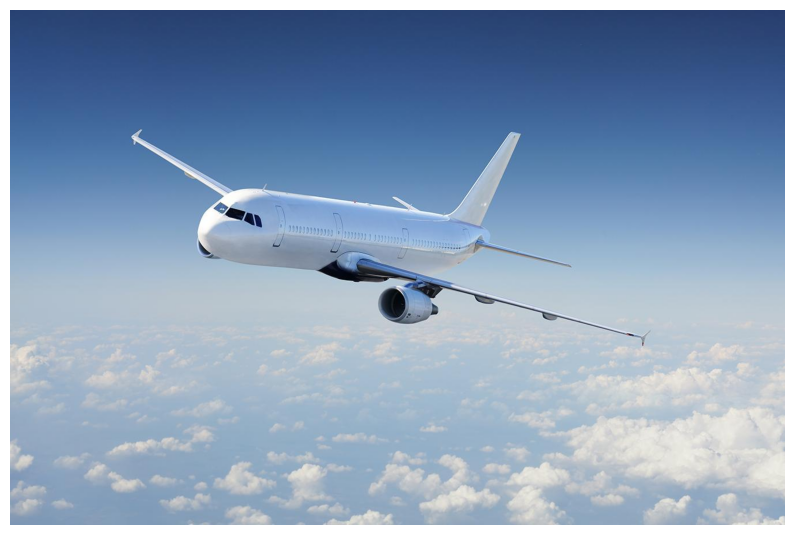

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('/content/drive/MyDrive/flight.jpg')
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

 # I. Datasetin Yoxlanması və Əsas Statistikası

In [5]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/airlines_flights_data.csv'

df = pd.read_csv(file_path)
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Dataset haqqında məlumat:

- airline — Aviaşirkət adı

- flight — Uçuş nömrəsi

- source_city — Uçuşun başladığı şəhər

- departure_time — Qalxma vaxtı (kateqoriya)

- stops — Dayanacaq sayı (zero/one/two_or_more)

- arrival_time — Enmə vaxtı (kateqoriya)

- destination_city — Enilən şəhər

- class — Bilet sinfi (Economy/Business)

- duration — Uçuş müddəti (saatla, desimal)

- days_left — Bilet alınan vaxtdan uçuşa qalan gün sayı

- price — Biletin qiyməti

In [ ]:
print("dataframe shape: ", df.shape)

dataframe shape:  (300153, 12)


In [ ]:

cols = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
df[cols] =df[cols].astype('string')

In [ ]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [ ]:
df.sample()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
107318,107318,SpiceJet,SG-209,Bangalore,Early_Morning,one,Evening,Kolkata,Economy,11.0,33,8536


In [ ]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.isna().mean()*100

,0
index,0.0
airline,0.0
flight,0.0
source_city,0.0
departure_time,0.0
stops,0.0
arrival_time,0.0
destination_city,0.0
class,0.0
duration,0.0


In [ ]:
df.isna().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# II. Vizuallaşdırma və Əlaqələrin Analizi

### 1. Datasetdə hansı aviaşirkətlər var və onların tezlikləri nə qədərdir?

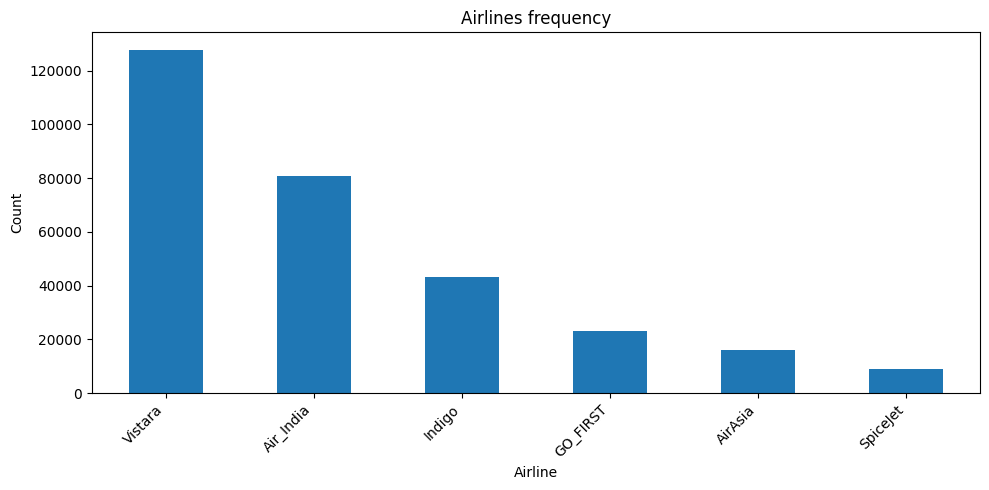

In [ ]:
airline_counts=df["airline"].value_counts()

plt.figure(figsize=(10,5))
airline_counts.plot(kind='bar')
plt.title('Airlines frequency')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2. Gediş vaxtı və Gəliş vaxtını təmsil edən Bar Qrafikləri göstərin.

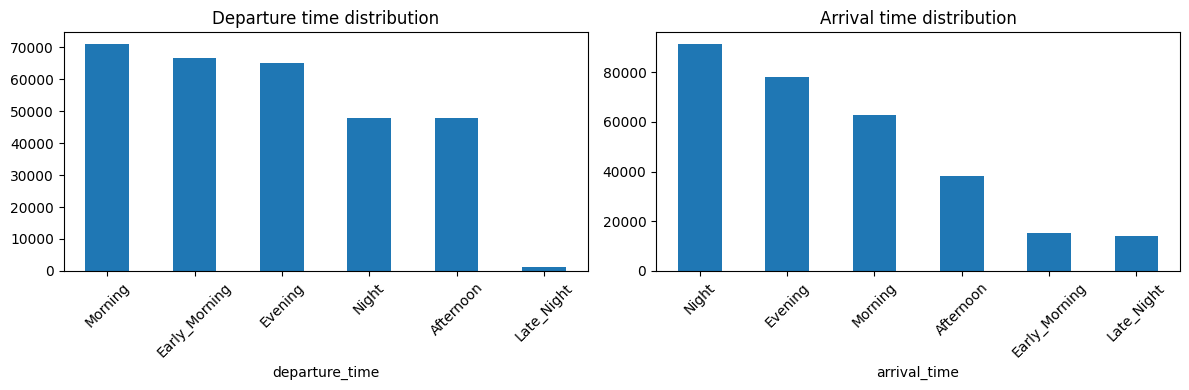

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df['departure_time'].value_counts().plot(kind='bar')
plt.title('Departure time distribution')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
df['arrival_time'].value_counts().plot(kind='bar')
plt.title('Arrival time distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Mənbə Şəhəri və Təyinat Şəhəri təmsil edən Bar Qrafikləri göstərin.

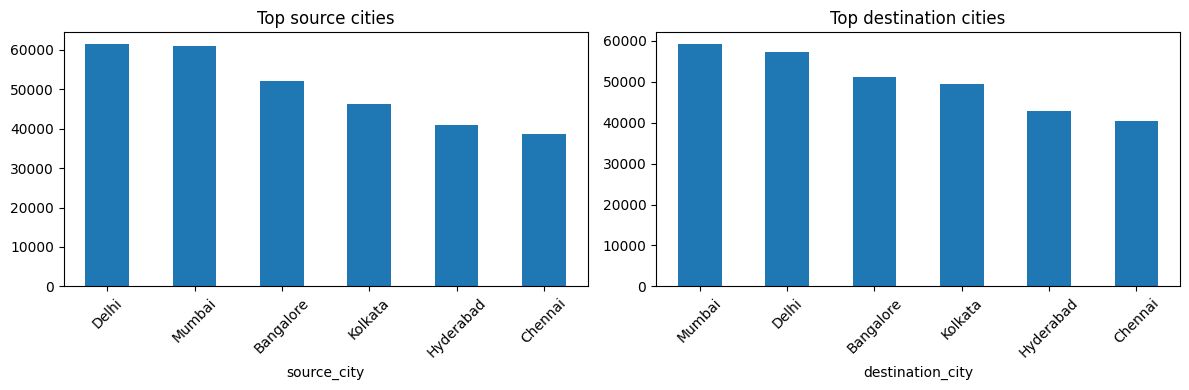

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df['source_city'].value_counts().head(15).plot(kind='bar')
plt.title('Top source cities')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
df['destination_city'].value_counts().head(15).plot(kind='bar')
plt.title('Top destination cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# III. Qiymət və Sinif Analizi

### 1. Qiymət aviaşirkətlərə görə dəyişirmi?

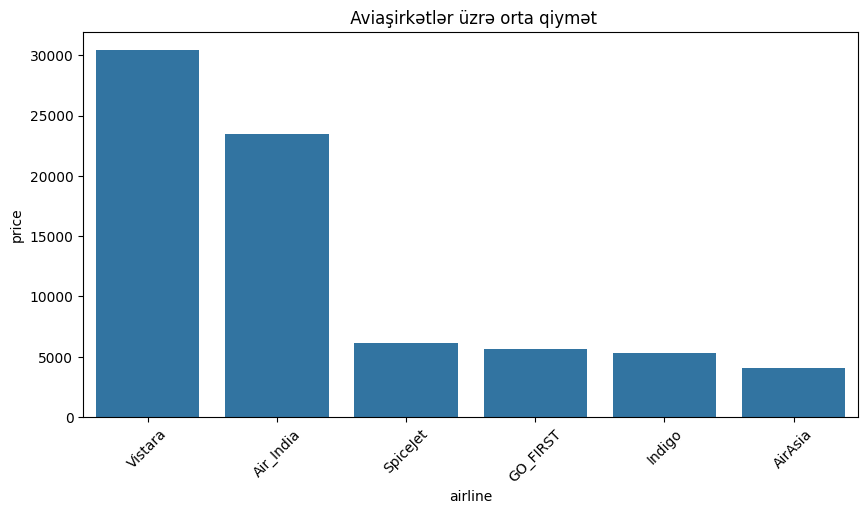

In [ ]:
# Bəli, qiymət aviaşirkətlərə görə dəyişir. Ən yüksək qiymət Vistara aviaşirkətindədir. Ən aşağı qiymət isə AirAsia.

airline_price = df.groupby("airline")["price"].mean().reset_index()
airline_price = airline_price.sort_values("price", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=airline_price, x="airline", y="price")
plt.xticks(rotation=45)
plt.title(" Aviaşirkətlər üzrə orta qiymət")
plt.show()

### 2. Bilet qiyməti gediş vaxtı və gəliş vaxtına əsasən dəyişirmi?

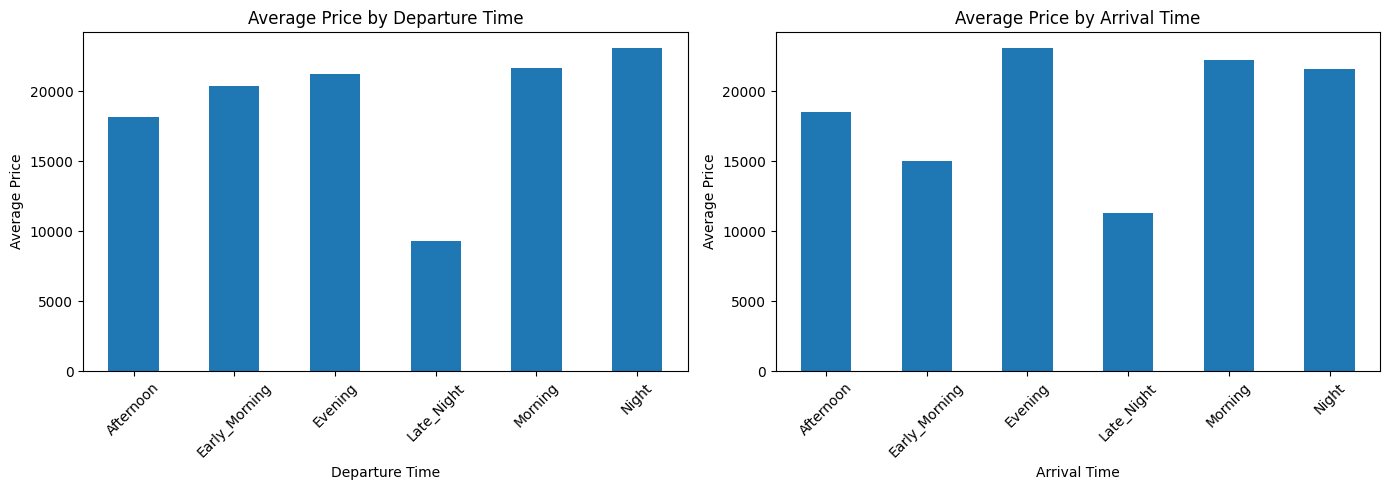

In [ ]:
departure_avg = df.groupby('departure_time')['price'].mean()
arrival_avg = df.groupby('arrival_time')['price'].mean()

plt.figure(figsize=(14,5))

# 1-ci qrafik – departure_time
plt.subplot(1, 2, 1)
departure_avg.plot(kind="bar")
plt.title("Average Price by Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Average Price")
plt.xticks(rotation=45)

# 2-ci qrafik – arrival_time
plt.subplot(1, 2, 2)
arrival_avg.plot(kind="bar")
plt.title("Average Price by Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Average Price")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 3. Qiymət mənbə və təyinatın dəyişməsi ilə necə dəyişir?

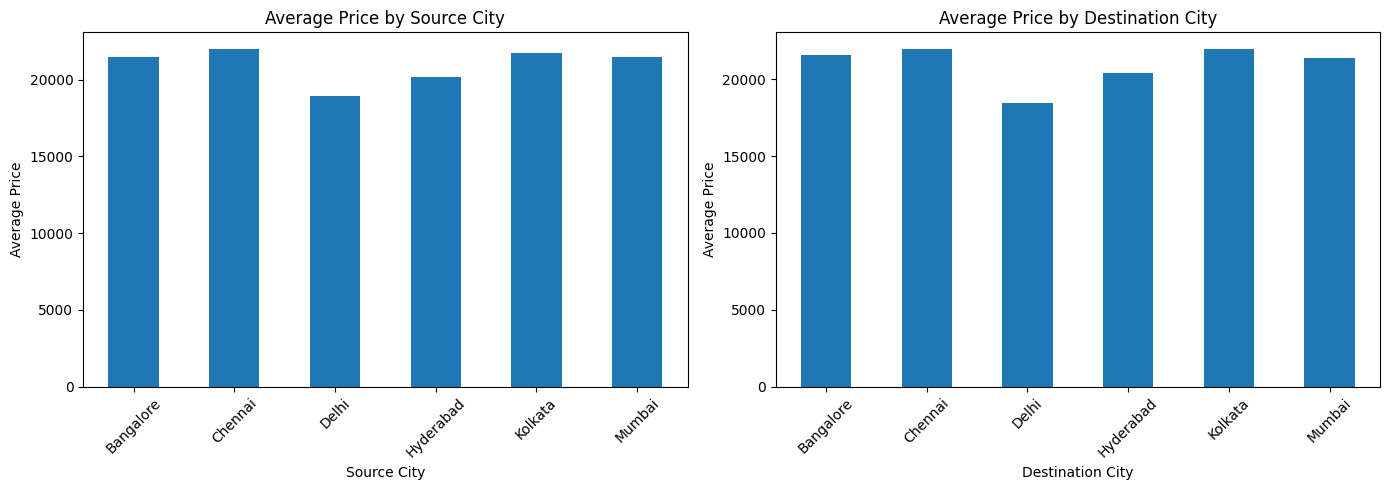

In [ ]:
source_avg = df.groupby("source_city")["price"].mean().round(2)
destination_avg = df.groupby("destination_city")["price"].mean().round(2)

plt.figure(figsize=(14,5))

# 1-ci qrafik – mənbə şəhəri
plt.subplot(1, 2, 1)
source_avg.plot(kind="bar")
plt.title("Average Price by Source City")
plt.xlabel("Source City")
plt.ylabel("Average Price")
plt.xticks(rotation=45)

# 2-ci qrafik – təyinat şəhəri
plt.subplot(1, 2, 2)
destination_avg.plot(kind="bar")
plt.title("Average Price by Destination City")
plt.xlabel("Destination City")
plt.ylabel("Average Price")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 4. Datasetdəki uçuşların orta müddəti (duration) nə qədərdir və bu müddət sinflərə görə necə fərqlənir?

Ümumi orta uçuş müddəti: 12.22

Siniflərə görə orta uçuş müddəti:
class
Business    13.70
Economy     11.55
Name: duration, dtype: float64


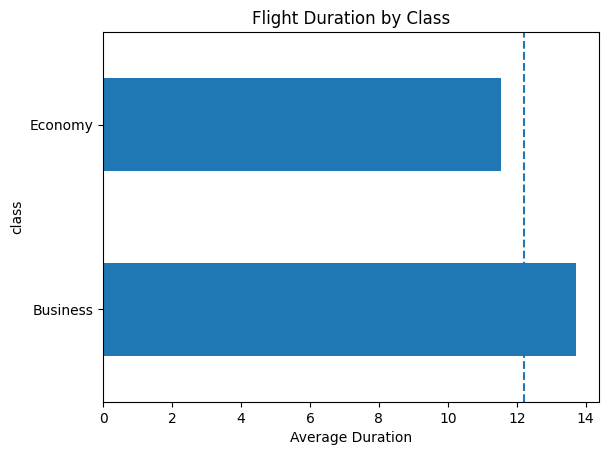

In [ ]:
# Ümumi orta uçuş müddəti ilə siniflərə görə orta uçuş müddətini müqayisə etdikdə görürük ki,
# Biznes sinfinde orta uçuş müddəti ümumi orta uçuş müddətindən çoxdur. Ekonom sinfinde isə əksinə, azdır.

avg_duration=df['duration'].mean()
avg_duration_class=df.groupby("class")["duration"].mean()

print("Ümumi orta uçuş müddəti:", round(avg_duration, 2))

print("\nSiniflərə görə orta uçuş müddəti:")
print(avg_duration_class.round(2))

avg_duration_class.plot(kind="barh")
plt.axvline(avg_duration, linestyle="--")
plt.xlabel("Average Duration")
plt.title("Flight Duration by Class")
plt.show()


### 5. Biznes sinfində uçuşların ümumi sayı və orta qiyməti İqtisadiyyat sinfi ilə müqayisədə necədir?

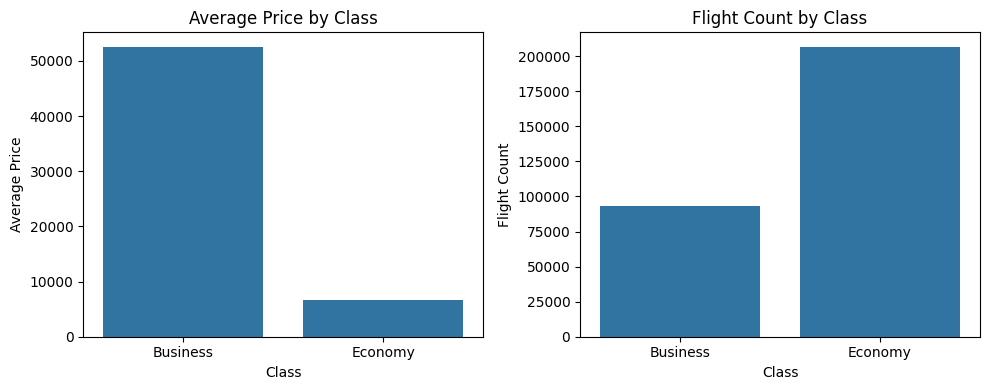

In [ ]:
# Sinife görə orta qiymət analizində görünür ki,
# Business sinifində bilet qiymətləri Economy sinfi ilə müqayisədə xeyli yüksəkdir.
# Lakin ümumi uçuş sayı əsasən Economy sinfində daha çoxdur.

summary = df.groupby("class")["price"].agg(
    average_price="mean",
    flight_count="count"
).reset_index()

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(data=summary, x="class", y="average_price")
plt.title("Average Price by Class")
plt.ylabel("Average Price")
plt.xlabel("Class")


plt.subplot(1,2,2)
sns.barplot(data=summary, x="class", y="flight_count")
plt.title("Flight Count by Class")
plt.ylabel("Flight Count")
plt.xlabel("Class")

plt.tight_layout()
plt.show()

### 6. Biletlər uçuşdan cəmi 1 və ya 2 gün əvvəl alındıqda qiymət necə təsirlənir?

In [ ]:
overall_avg = df["price"].mean().round(2)

days_left_avg = (
    df[df["days_left"].isin([1, 2])]
    .groupby("days_left")["price"]
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={"price": "avg_price"})
)

print(f"Overall Average Price: {overall_avg}")
print("\nAverage Price When Days Left is 1 or 2:")
print(days_left_avg)


Overall Average Price: 20889.66

Average Price When Days Left is 1 or 2:
   days_left  avg_price
0          1   21591.87
1          2   30211.30


### 7. Bilet qiyməti İqtisadiyyat və Biznes sinfi arasında necə dəyişir?

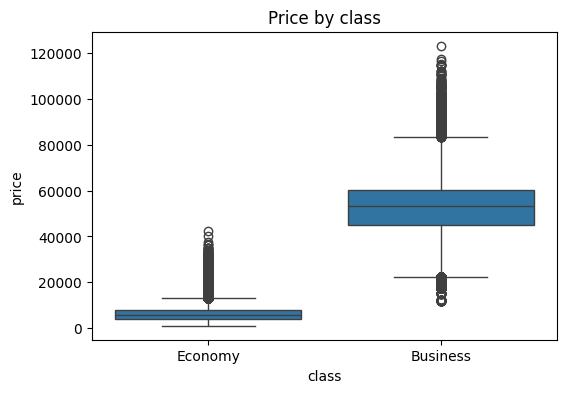

In [ ]:
'''
Boxplot göstərir ki, Business sinifində qiymətlər Economy sinfinə nisbətən həm xeyli yüksək,
həm də daha geniş diapazonda dəyişir. Economy biletləri daha stabil və aşağı qiymətlidir,
Business isə həm yüksək qiymət, həm də yüksək dəyişkənlik göstərir. '''

df.groupby('class')['price'].agg(['count','mean','median'])

plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='price', data=df)
plt.title('Price by class')
plt.show()

### 8. Dayanacaq sayı (stops) qiymətə necə təsir edir?

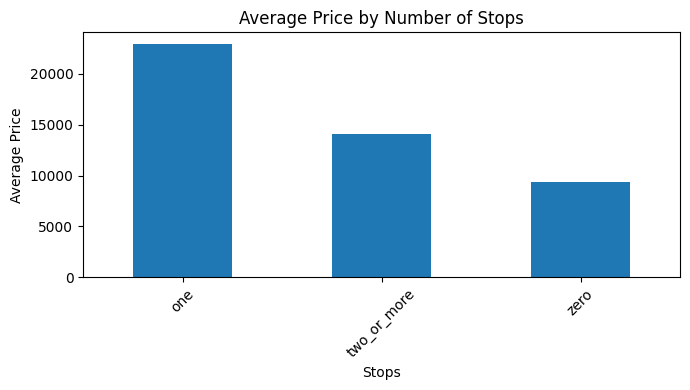

In [ ]:
'''
Analiz göstərir ki, bir dayanacaqlı uçuşlar ən yüksək qiymətə sahibdir, iki və daha çox dayanacaqlı uçuşlar orta qiymət səviyyəsindədir,
birbaşa uçuşlar isə ən ucuzdur. Bu datasetdə direct flights gözlənildiyindən daha sərfəlidir.
'''

stops_mean = df.groupby("stops")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(7,4))
stops_mean.plot(kind="bar")

plt.title("Average Price by Number of Stops")
plt.xlabel("Stops")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 9. Günlər qalmış (days_left) dəyişkəninə görə qiymətin paylanması necədir?

/tmp/ipython-input-3130716207.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_days = df.groupby("days_left_group")["price"].mean().round(2)


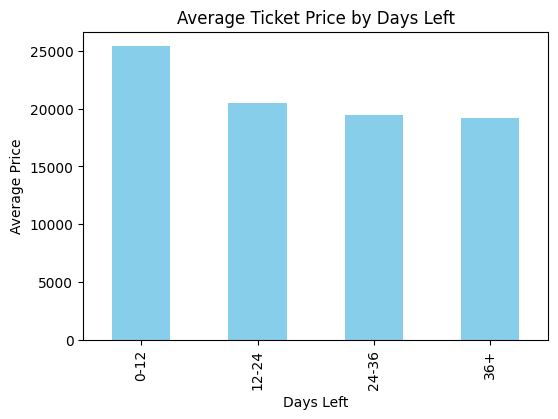

In [ ]:
'''
Analiz bunu gösterir ki, ən yüksək bilet qiymətləri uçuşa 0-12 gün qalmış olan uçuşlardadır.
'''

df["days_left_group"] = pd.cut(df["days_left"],
 bins=[0, 12, 24, 36, 48], labels=["0-12", "12-24", "24-36", "36+"])


avg_price_days = df.groupby("days_left_group")["price"].mean().round(2)

plt.figure(figsize=(6,4))
avg_price_days.plot(kind="bar", color="skyblue")
plt.title("Average Ticket Price by Days Left")
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.show()

### 10. Hansı mənbə şəhərdən (source_city) ən çox uçuş var və onların orta qiyməti nə qədərdir?

In [ ]:
'''
Çox uçuş olan mənbə şəhərimiz Delhidi. Uçuşların sayı 61.343 və orta qiymət isə 18.951
'''

df.groupby("source_city")["price"].agg(["mean","count"]).sort_values("count", ascending=False).round(2)


,mean,count
source_city,,
Delhi,18951.33,61343
Mumbai,21483.82,60896
Bangalore,21469.46,52061
Kolkata,21746.24,46347
Hyderabad,20155.62,40806
Chennai,21995.34,38700


### 11. Datasetdəki ən bahalı və ən ucuz uçuşlar hansı aviaşirkətlərə və şəhərlərə aiddir?

In [ ]:
'''
Datasetimizdə top 5 baha uçuşlarımız Vistara aviaşirkətinə məxsusdur.
Top 5 ən ucuz uçuşlar isə GoFirst və Indigo aviaşirkətlərə məxsusdur.
'''


flight_columns= ['airline','source_city','destination_city','class','price']

top5_expensive = df.sort_values('price', ascending=False).head(5)
print("Ən bahalı uçuşlar")
print(top5_expensive[flight_columns])
print(" ")
print("Ən ucuz uçuşlar:")
top5_cheap = df.sort_values('price', ascending=True).head(5)
print(top5_cheap[flight_columns])




Ən bahalı uçuşlar
        airline source_city destination_city     class   price
261377  Vistara     Kolkata            Delhi  Business  123071
216096  Vistara       Delhi          Kolkata  Business  117307
215859  Vistara       Delhi          Kolkata  Business  116562
277345  Vistara   Hyderabad           Mumbai  Business  115211
270999  Vistara     Kolkata        Hyderabad  Business  114705
 
Ən ucuz uçuşlar:
         airline source_city destination_city    class  price
205100  GO_FIRST     Chennai        Hyderabad  Economy   1105
205112    Indigo     Chennai        Hyderabad  Economy   1105
205111    Indigo     Chennai        Hyderabad  Economy   1105
205110    Indigo     Chennai        Hyderabad  Economy   1105
205641    Indigo     Chennai        Hyderabad  Economy   1105
